Memuat Dataset:

Membaca file kiva_loan.csv menggunakan library pandas untuk memeriksa isi dataset secara keseluruhan.
Menampilkan Informasi Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = "kiva_loan.csv"
df = pd.read_csv(file_path)
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


Data Understanding
Pada tahap ini, saya akan melakukan eksplorasi awal terhadap dataset untuk memahami struktur, isi, dan karakteristik data. Langkah-langkah yang akan dilakukan meliputi:

1. Meninjau struktur dataset, termasuk jumlah baris dan kolom.
Mengidentifikasi tipe data untuk setiap kolom.
Memeriksa apakah ada nilai yang hilang (missing values) di dalam dataset.
Melihat Statistik Deskriptif:

2. Menganalisis statistik deskriptif (mean, median, min, max) untuk kolom numerik seperti funded_amount, loan_amount, dan term_in_months.
Melihat distribusi nilai untuk kolom numerik untuk menemukan pola atau outlier awal.
Eksplorasi Kolom-Kolom Penting:

3. Memahami arti kolom-kolom utama seperti:
funded_amount: Jumlah dana yang telah dicairkan oleh Kiva.
loan_amount: Jumlah pinjaman yang disalurkan ke peminjam.
sector dan activity: Kategori sektor dan aktivitas pinjaman.
country dan region: Lokasi geografis pinjaman.
Memeriksa jumlah nilai unik dalam kolom kategori (sector, activity, country).
Tujuan:

4. Memahami distribusi data.
Mengidentifikasi potensi masalah, seperti nilai hilang atau tidak sesuai.
Menyiapkan dataset untuk langkah berikutnya, yaitu Data Cleaning.

In [2]:
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

id                    671205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424912
country                   87
region                 12695
currency                  67
partner_id               366
posted_time           667399
funded_time           498007
term_in_months           148
lender_count             503
repayment_interval         4
dtype: int64

Data Cleaning
Pada tahap ini, saya akan melakukan proses Data Cleaning untuk memastikan bahwa dataset yang digunakan bersih, konsisten, dan siap untuk analisis lebih lanjut. Langkah-langkah yang dilakukan meliputi:

Mengidentifikasi dan Menangani Missing Values:

1. Data yang hilang atau kosong (missing values) dapat memengaruhi hasil analisis dan visualisasi.
Saya akan memeriksa kolom mana saja yang memiliki missing values dan menentukan langkah penanganan:
Menghapus baris/kolom dengan banyak missing values, atau
Mengisi nilai yang hilang dengan median, rata-rata, atau nilai yang sesuai tergantung konteks.
Menghapus Data Duplikat:

2. Data duplikat dapat menyebabkan perhitungan statistik menjadi tidak akurat.
Saya akan memeriksa apakah ada baris data yang duplikat dan menghapusnya jika ditemukan.
Menyesuaikan Format Data:

3. Kolom waktu seperti posted_time dan funded_time akan dikonversi ke format datetime agar lebih mudah dianalisis.
Kolom numerik seperti funded_amount dan loan_amount akan dipastikan berada dalam format angka (integer/float).
Menangani Outliers:

4. Outliers adalah nilai ekstrem yang dapat memengaruhi hasil analisis.
Saya akan memeriksa distribusi kolom numerik seperti funded_amount dan loan_amount untuk mengidentifikasi outliers dan menentukan apakah perlu ditangani (misalnya, dengan pemangkasan atau transformasi data).
Normalisasi dan Konsistensi Data:

5. Kolom kategori seperti sector dan activity akan diperiksa untuk memastikan ejaan atau formatnya konsisten.
Mata uang (currency) akan dicek untuk memastikan tidak ada inkonsistensi dalam data.


In [3]:
print("Missing Values per Column:")
print(df.isnull().sum())

df_cleaned = df.dropna()

df_cleaned["posted_time"] = pd.to_datetime(df_cleaned["posted_time"], errors="coerce")
df_cleaned["funded_time"] = pd.to_datetime(df_cleaned["funded_time"], errors="coerce")

df_cleaned = df_cleaned.drop_duplicates()

Missing Values per Column:
id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\3985935955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["posted_time"] = pd.to_datetime(df_cleaned["posted_time"], errors="coerce")
C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\3985935955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["funded_time"] = pd.to_datetime(df_cleaned["funded_time"], errors="coerce")


Analisis Berdasarkan Negara:

1. Mengidentifikasi negara-negara dengan total pendanaan tertinggi.
Mengeksplorasi negara mana yang memiliki peluang besar untuk investasi dan kontribusi sosial.
Analisis Berdasarkan Sektor dan Aktivitas:

2. Memeriksa sektor-sektor utama seperti Agriculture, Food, dan Retail untuk memahami bidang yang paling banyak didukung oleh Kiva.
Melihat aktivitas spesifik dalam sektor-sektor tersebut yang menerima pendanaan besar.
Distribusi Pinjaman:

3. Menganalisis durasi pinjaman (term_in_months) untuk memahami rata-rata waktu pelunasan pinjaman.
Melihat pola pelunasan berdasarkan jenis interval pelunasan (repayment_interval).
Hubungan Antar Variabel:

4. Mengeksplorasi hubungan antara jumlah pemberi pinjaman (lender_count) dan jumlah pinjaman (loan_amount) untuk memahami pola investasi kolektif.
Menganalisis bagaimana sektor tertentu dapat memengaruhi besar pinjaman atau jumlah pemberi pinjaman.
Identifikasi Risiko dan Peluang:

5. Menilai pola pendanaan yang dapat menunjukkan risiko seperti outliers dalam jumlah pendanaan atau durasi pinjaman yang sangat panjang.
Mengidentifikasi wilayah atau sektor dengan potensi pertumbuhan pendanaan.


In [4]:
# Total funding berdasarkan negara
total_funding_country = (
    df_cleaned.groupby("country")["funded_amount"].sum().sort_values(ascending=False)
)
print("Total Funding per Country:")
print(total_funding_country)

# Sektor pendanaan paling besar
sector_funding = (
    df_cleaned.groupby("sector")["funded_amount"].sum().sort_values(ascending=False)
)
print("Funding per Sector:")
print(sector_funding)

# Distribusi cara pelunasan (repayment interval)
repayment_distribution = df_cleaned["repayment_interval"].value_counts()
print("Repayment Interval Distribution:")
print(repayment_distribution)

# Distribusi durasi pinjaman
loan_duration_distribution = df_cleaned["term_in_months"].value_counts()
print("Loan Duration Distribution:")
print(loan_duration_distribution)

Total Funding per Country:
country
Philippines    53546825.0
Peru           29708250.0
Paraguay       29016650.0
Kenya          28525800.0
Cambodia       18180100.0
                  ...    
Turkey            29800.0
Mauritania        15000.0
Afghanistan       14000.0
Bhutan            10000.0
Vanuatu            9250.0
Name: funded_amount, Length: 82, dtype: float64
Funding per Sector:
sector
Agriculture       115379800.0
Food               91178800.0
Retail             73319075.0
Services           32333200.0
Clothing           28445975.0
Education          27192725.0
Housing            16676925.0
Personal Use       13026325.0
Arts               10084175.0
Transportation      8380050.0
Health              7866525.0
Construction        5278000.0
Manufacturing       4826075.0
Wholesale            834625.0
Entertainment        589150.0
Name: funded_amount, dtype: float64
Repayment Interval Distribution:
monthly      280625
irregular    236992
bullet        56506
Name: repayment_interval,

Data Visualization  
Pertama yang saya lakukan adalah Total funding berdasarkan negara (bar chart)
Disini saya mendapat kan jika:
1. Filipina menempati posisi pertama dengan total pendanaan tertinggi, lebih dari 50 juta USD.
2. Peru, Paraguay, dan Kenya mengikuti Filipina dengan total pendanaan sekitar 30 juta USD masing-masing.
3. Kamboja, Bolivia, dan Uganda menempati posisi berikutnya,lebih rendah dibandingkan dengan Filipina dan Peru

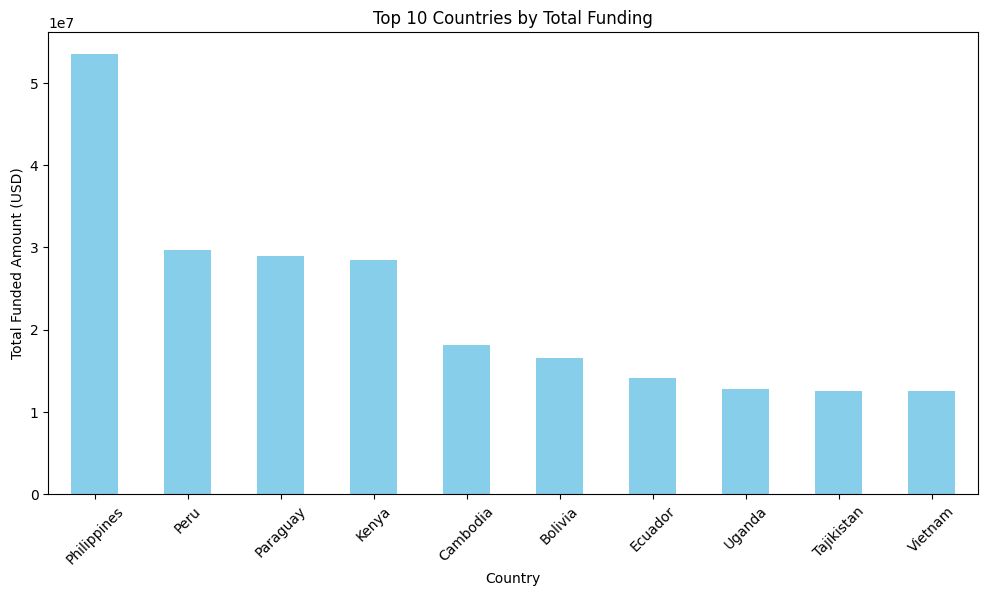

In [5]:
plt.figure(figsize=(12, 6))
total_funding_country.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Total Funding")
plt.ylabel("Total Funded Amount (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

Kedua adalah Funding per sector dalam bentuk pie chart  
Yang saya dapatkan adalah:

1. Sektor Agriculture mendominasi dengan kontribusi 27.7% dari total pendanaan, ini menjadi prioritas utama untuk pendanaan di Kiva
2. Sektor Food berada di peringkat kedua dengan kontribusi 21.9%, ini menunjukkan adanya permintaan besar untuk pendanaan terkait makanan.
3. Retail menempati posisi ketiga, menunjukkan pendanaan untuk usaha kecil menengah (UMKM) yang berorientasi pada perdagangan barang.

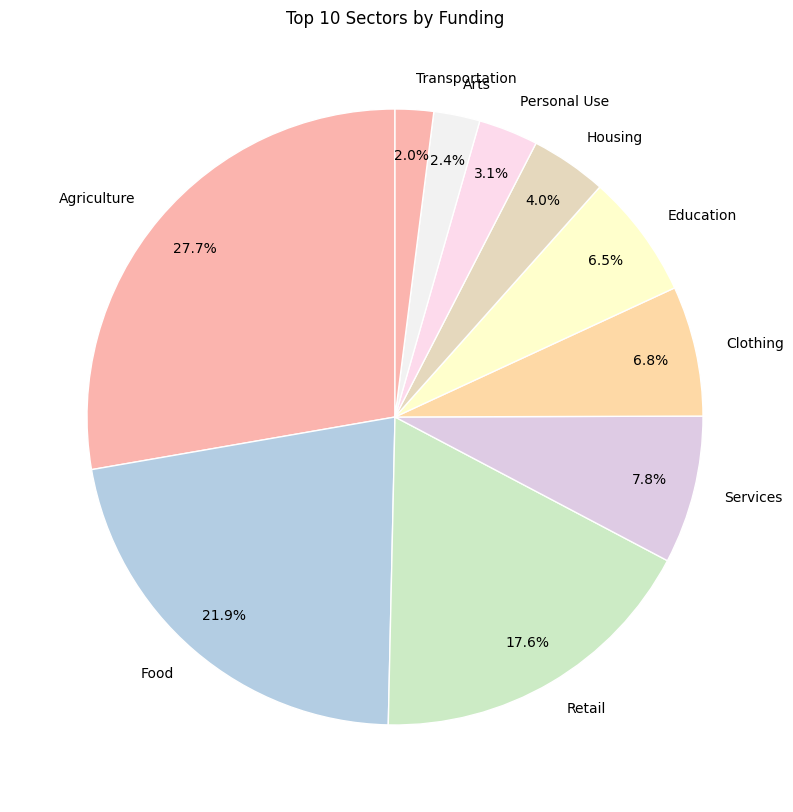

In [6]:
plt.figure(figsize=(10, 10))
sector_funding.head(10).plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
    labeldistance=1.1,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)
plt.title("Top 10 Sectors by Funding")
plt.ylabel("")
plt.show()

Distribusi durasi pinjaman dalam bentuk histogram, kesimpulan:  
1. Mayoritas pinjaman memiliki durasi yang relatif pendek, berkisar antara 0 hingga 20 bulan.
2. Histogram memiliki distribusi yang miring ke kanan (right-skewed), yang berarti ada sejumlah kecil pinjaman dengan durasi sangat panjang (lebih dari 60 bulan).
3. Walaupun sangat jarang, terdapat pinjaman dengan durasi hingga 160 bulan.

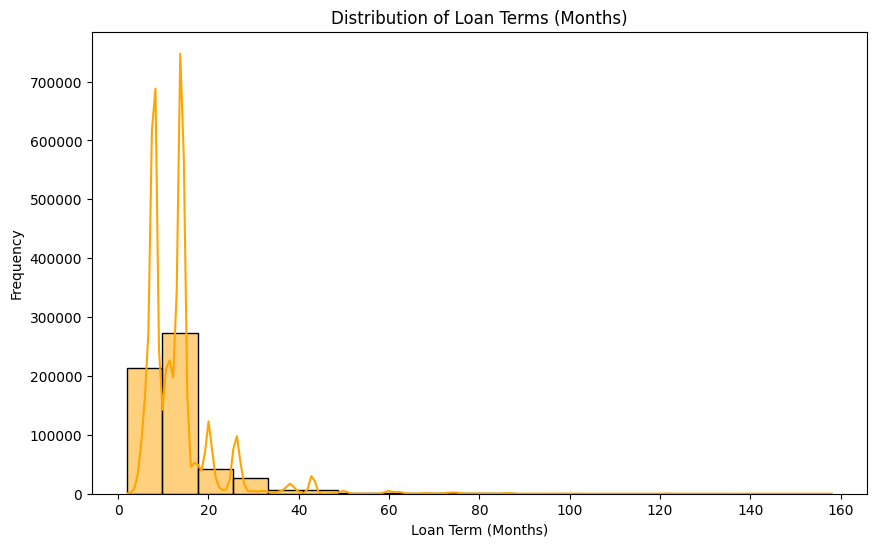

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['term_in_months'], bins=20, kde=True, color='orange')
plt.title("Distribution of Loan Terms (Months)")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.show()

Lalu terakhir Lender count vs loan amount dalam bentuk scatter plot, kesimpulan:  
1. Hubungan yang positif: Pinjaman dengan jumlah yang lebih besar cenderung melibatkan lebih banyak pemberi pinjaman
2. Sebagian besar pinjaman terkonsentrasi pada jumlah pemberi pinjaman di bawah 500 lender, dengan jumlah pinjaman di bawah 20.000 USD. Ini menunjukkan bahwa platform Kiva lebih sering memfasilitasi pinjaman kecil yang diakses oleh banyak peminjam.
3. Terdapat beberapa pinjaman besar yang melibatkan lebih dari 2.500 lender dan mencapai jumlah pinjaman mendekati 100.000 USD

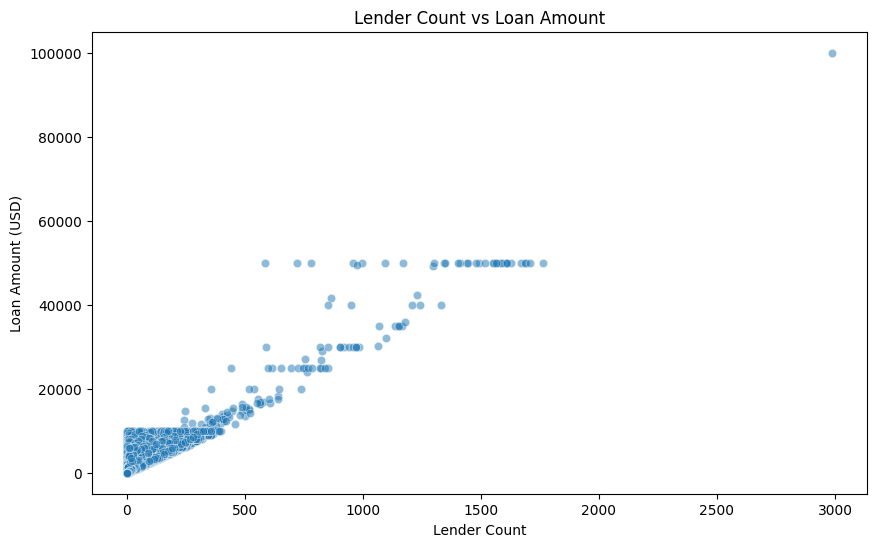

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lender_count', y='loan_amount', data=df_cleaned, alpha=0.5)
plt.title("Lender Count vs Loan Amount")
plt.xlabel("Lender Count")
plt.ylabel("Loan Amount (USD)")
plt.show()